In [1]:
# Install required packages
!pip install -q -U transformers peft accelerate bitsandbytes trl huggingface_hub evaluate rouge_score
!pip install -q datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.9 MB/s eta 0:00:0

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import BitsAndBytesConfig
import torch
from google.colab import drive

# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Configuration
MODEL_PATH = "/content/drive/MyDrive/databricks_docs_model"
MAX_TOKENS = 2048
TEMPERATURE = 0.3  # Lower for technical accuracy
TOP_P = 0.85

# Load model with 4-bit quantization for efficiency
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

# Create optimized pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto"
)

def get_technical_response(question):
    """Generate a high-quality technical response with structured output"""
    structured_prompt = f"""You are a Databricks expert. Provide a detailed response with:
1. Clear explanation
2. Code examples in ```sql or ```python blocks
3. Practical use cases
4. Common pitfalls

Question: {question}

Answer:"""

    response = pipe(
        structured_prompt,
        max_new_tokens=MAX_TOKENS,
        temperature=TEMPERATURE,
        top_p=TOP_P,
        do_sample=True,
        repetition_penalty=1.1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )

    return response[0]['generated_text']

Mounted at /content/drive


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Device set to use cuda:0


In [3]:
# Example usage
test_question = """How can I use the `stack` function to generate a set of rows with specified values in Databricks SQL Databricks Runtime?
Please include, as relevant:
1. The exact syntax
2. A practical example
3. The expected output
4. Any common errors to avoid"""

response = get_technical_response(test_question)
print(response)

You are a Databricks expert. Provide a detailed response with:
1. Clear explanation
2. Code examples in ```sql or ```python blocks
3. Practical use cases
4. Common pitfalls

Question: How can I use the `stack` function to generate a set of rows with specified values in Databricks SQL Databricks Runtime?
Please include, as relevant:
1. The exact syntax
2. A practical example
3. The expected output
4. Any common errors to avoid

Answer:
The `stack` function in Databricks SQL Databricks Runtime is used to generate a set of rows with specified values. Here's the syntax:
```sql
stack(num_rows, value)
```
Where `num_rows` is an integral numeric expression and `value` is any expression. If `num_rows` is less than 0, the result is empty.

Here's a practical example:
```sql
SELECT stack(5, 'Spark');
```
This will return a set of five rows with the value 'Spark':
```vbnet
Spark
Spark
Spark
Spark
Spark
```
Common errors to avoid:
1. Make sure `num_rows` is a non-negative integer.
2. Ensure that `

To properly evaluate our fine-tuned model, we'll calculate perplexity on a validation set and compare it with the base model.

1. Load our Validation Dataset

In [ ]:
from datasets import load_dataset

# Load your formatted dataset
val_dataset_path = '/content/drive/MyDrive/databricks_docs_instructions_test.json'
val_dataset = load_dataset('json', data_files=val_dataset_path, split='train')

In [ ]:
print(val_dataset)

Dataset({
    features: ['instruction', 'input', 'output', 'context'],
    num_rows: 100
})


2. Perplexity Calculation Function:

A perplexity calculation function that handles large datasets:

In [ ]:
import torch
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer

def calculate_perplexity(model, tokenizer, dataset, device='cuda', max_length=512):
    """
    Calculate perplexity on a given dataset
    Args:
        model: Loaded HuggingFace model
        tokenizer: Model's tokenizer
        dataset: List of text samples
        device: Device to use ('cuda' or 'cpu')
        max_length: Maximum sequence length
    Returns:
        perplexity: Float perplexity value
    """
    model.eval()
    losses = []

    with torch.no_grad():
        for sample in tqdm(dataset, desc="Calculating Perplexity"):
            # Tokenize with padding/truncation
            inputs = tokenizer(
                sample['text'],
                return_tensors='pt',
                truncation=True,
                max_length=max_length,
                padding='max_length'
            ).to(device)

            # Calculate loss
            outputs = model(**inputs, labels=inputs['input_ids'])
            loss = outputs.loss
            losses.append(loss.item())

    # Calculate perplexity
    perplexity = torch.exp(torch.tensor(losses).mean()).item()
    return perplexity

Evaluate Both Models:

Let's compare our fine-tuned model with the base model:

In [ ]:
from transformers import BitsAndBytesConfig

# Configuration
BASE_MODEL = "mistralai/Mistral-7B-v0.1"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# 4-bit config for memory efficiency
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# Load base model
print("Loading base model...")
base_tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

# Set the pad token for the base tokenizer
if base_tokenizer.pad_token is None:
    base_tokenizer.pad_token = base_tokenizer.eos_token

base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    quantization_config=bnb_config,
    device_map="auto"
)

# Load fine-tuned model
print("Loading fine-tuned model...")
ft_tokenizer = tokenizer
ft_model = model

# Set the pad token for the fine-tuned tokenizer (which is the 'tokenizer' variable here)
if ft_tokenizer.pad_token is None:
    ft_tokenizer.pad_token = ft_tokenizer.eos_token

Loading base model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading fine-tuned model...


In [ ]:
import torch
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

def calculate_perplexity(model, tokenizer, dataset, device='cuda', max_length=512):
    """
    Calculate perplexity on a given dataset
    Args:
        model: Loaded HuggingFace model
        tokenizer: Model's tokenizer
        dataset: List of text samples
        device: Device to use ('cuda' or 'cpu')
        max_length: Maximum sequence length
    Returns:
        perplexity: Float perplexity value
    """
    model.eval()
    losses = []

    with torch.no_grad():
        for sample in tqdm(dataset, desc="Calculating Perplexity"):
            # Tokenize with padding/truncation
            # Assuming the text content is in the 'instruction' key based on the dataset loading
            try:
                text_content = sample['instruction']
            except KeyError:
                 # Fallback or raise a more informative error if 'instruction' is not found
                 print(f"Error: Dataset sample does not contain the expected key ('instruction').")
                 print(f"Sample keys available: {sample.keys()}")
                 raise # Re-raise the original KeyError for debugging

            inputs = tokenizer(
                text_content,
                return_tensors='pt',
                truncation=True,
                max_length=max_length,
                padding='max_length' # This requires a pad token
            ).to(device)

            # Calculate loss
            # Shift input_ids to create labels for causal language modeling
            labels = inputs['input_ids'].clone()
            # Ignore padding in loss calculation by setting padding token ids to -100
            labels[inputs['attention_mask'] == 0] = -100

            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            losses.append(loss.item())

    # Calculate perplexity
    perplexity = torch.exp(torch.tensor(losses).mean()).item()
    return perplexity

In [ ]:
# Calculate perplexities
print("Evaluating base model...")
base_ppl = calculate_perplexity(base_model, base_tokenizer, val_dataset)  # Smaller subset for demo

print("Evaluating fine-tuned model...")
ft_ppl = calculate_perplexity(ft_model, ft_tokenizer, val_dataset)

print(f"\nResults:")
print(f"Base Model Perplexity: {base_ppl:.2f}")
print(f"Fine-Tuned Model Perplexity: {ft_ppl:.2f}")
print(f"Improvement: {((base_ppl - ft_ppl)/base_ppl)*100:.1f}%")

Evaluating base model...


Calculating Perplexity: 100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


Evaluating fine-tuned model...


Calculating Perplexity: 100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


Results:
Base Model Perplexity: 27.18
Fine-Tuned Model Perplexity: 11.12
Improvement: 59.1%


Enhanced Evaluation Metrics: For a more comprehensive evaluation, we are adding these metrics

In [ ]:
from evaluate import load
import numpy as np
import torch # Ensure torch is imported here as well
from tqdm import tqdm # Ensure tqdm is imported here as well
from transformers import AutoModelForCausalLM, AutoTokenizer # Ensure these are imported

def evaluate_model(model, tokenizer, dataset):
    """Calculate multiple evaluation metrics"""
    bleu = load("bleu")
    rouge = load("rouge")

    predictions, references = [], []

    # Process a subset of the dataset for faster evaluation
    # You can adjust the size [0:50] or remove it to evaluate the full dataset
    for sample in tqdm(dataset, desc="Evaluating"):
        # Ensure the sample is a dictionary
        if not isinstance(sample, dict):
            print(f"Skipping unexpected sample type: {type(sample)}")
            print(f"Problematic sample value: {sample}")
            continue

        # Generate prediction
        prompt_parts = []
        if 'instruction' in sample and sample['instruction']:
            prompt_parts.append(sample['instruction'])
        if 'input' in sample and sample['input']:
            # Add a separator if both instruction and input exist
            if prompt_parts:
                prompt_parts.append("\n")
            prompt_parts.append(sample['input'])

        # If no valid prompt parts are found, skip this sample
        if not prompt_parts:
            print(f"Skipping sample due to missing 'instruction' and 'input' keys: {sample.keys()}")
            continue

        # Combine the prompt parts
        input_prompt = "\n".join(prompt_parts) + "\n" # Add a newline to indicate where output should start

        # Ensure the 'output' key exists for the reference
        if 'output' not in sample or not sample['output']:
             print(f"Skipping sample as 'output' key is missing or empty for reference: {sample.keys()}")
             continue

        try:
            # Tokenize the input prompt
            inputs = tokenizer(input_prompt, return_tensors="pt", truncation=True, max_length=1024).to(DEVICE)

            # Generate the response
            # Adjust max_new_tokens to something reasonable for evaluation
            # Use the same generation parameters as in get_technical_response if possible,
            # but keep it consistent between base and fine-tuned for fair comparison.
            # Setting do_sample=False and a higher num_beams might give more deterministic
            # and potentially higher quality outputs for evaluation metrics like BLEU/ROUGE.
            # However, if your fine-tuning used sampling, keep do_sample=True.
            # Let's use sampling as in your original generation function.
            outputs = model.generate(
                **inputs,
                max_new_tokens=MAX_TOKENS, # Use your defined MAX_TOKENS
                temperature=TEMPERATURE,
                top_p=TOP_P,
                do_sample=True,
                repetition_penalty=1.1,
                eos_token_id=tokenizer.eos_token_id,
                pad_token_id=tokenizer.eos_token_id # Important for batching if needed
            )

            # Decode the generated output. Need to slice to get only the generated part.
            # Find the length of the original prompt tokens
            input_len = inputs['input_ids'].shape[1]
            # Decode from the end of the input prompt tokens
            generated_output_tokens = outputs[0][input_len:]
            pred = tokenizer.decode(generated_output_tokens, skip_special_tokens=True).strip()

            predictions.append(pred)
            references.append(sample['output'].strip()) # Ensure reference is also stripped

        except Exception as e:
            print(f"Error processing sample: {sample.get('instruction', 'N/A')}. Error: {e}")
            continue # Skip this sample if an error occurs during processing


    # Calculate metrics
    if not predictions or not references:
        print("Warning: No valid samples processed for evaluation.")
        return {
            "bleu": 0.0,
            "rouge1": 0.0,
            "rouge2": 0.0,
            "rougeL": 0.0
        }

    # For rouge and bleu, references should be a list of lists for multi-reference scenarios,
    # but for single reference per sample, it's a list of strings, which is handled by the libraries.
    # Let's format references as a list of lists, where each inner list contains the single reference string.
    formatted_references = [[ref] for ref in references]


    # BLEU metric expects a list of lists of references
    bleu_score = bleu.compute(predictions=predictions, references=formatted_references)
    # ROUGE metric expects lists of strings
    rouge_score = rouge.compute(predictions=predictions, references=references)


    return {
        "bleu": bleu_score.get("bleu", 0.0), # Use .get for safety
        "rouge1": rouge_score.get("rouge1", 0.0),
        "rouge2": rouge_score.get("rouge2", 0.0),
        "rougeL": rouge_score.get("rougeL", 0.0)
    }

# Make sure all necessary variables are defined before calling evaluate_model
# e.g., BASE_MODEL, DEVICE, bnb_config, base_tokenizer, base_model, ft_tokenizer, ft_model, val_dataset
# Assuming these are defined in the preceding code.

print("\nAdditional Metrics Comparison:")
print(f"{'Metric':<10} | {'Base Model':>12} | {'Fine-Tuned':>12}")
print("-" * 40)

try:
    base_metrics = evaluate_model(base_model, base_tokenizer, val_dataset.select(range(10)))
    ft_metrics = evaluate_model(ft_model, ft_tokenizer, val_dataset.select(range(10)))

    for metric in base_metrics:
        print(f"{metric:<10} | {base_metrics[metric]:>12.4f} | {ft_metrics[metric]:>12.4f}")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")


Additional Metrics Comparison:
Metric     |   Base Model |   Fine-Tuned
----------------------------------------


Evaluating: 100%|██████████| 10/10 [12:40<00:00, 76.04s/it]


bleu       |       0.0880 |       0.0408
rouge1     |       0.3434 |       0.3489
rouge2     |       0.1242 |       0.1492
rougeL     |       0.1993 |       0.2119


In [ ]:
# Subset the dataset for faster evaluation
subset_size = 100 # Define how many samples you want to use
eval_dataset_subset = val_dataset.select(range(subset_size))

print("\nAdditional Metrics Comparison:")
print(f"{'Metric':<10} | {'Base Model':>12} | {'Fine-Tuned':>12}")
print("-" * 40)

try:
    # Evaluate on the subset
    base_metrics = evaluate_model(base_model, base_tokenizer, eval_dataset_subset)
    ft_metrics = evaluate_model(ft_model, ft_tokenizer, eval_dataset_subset)

    for metric in base_metrics:
        print(f"{metric:<10} | {base_metrics[metric]:>12.4f} | {ft_metrics[metric]:>12.4f}")

except Exception as e:
    print(f"An error occurred during evaluation: {e}")


Visualization

Create visual comparisons of the metrics:

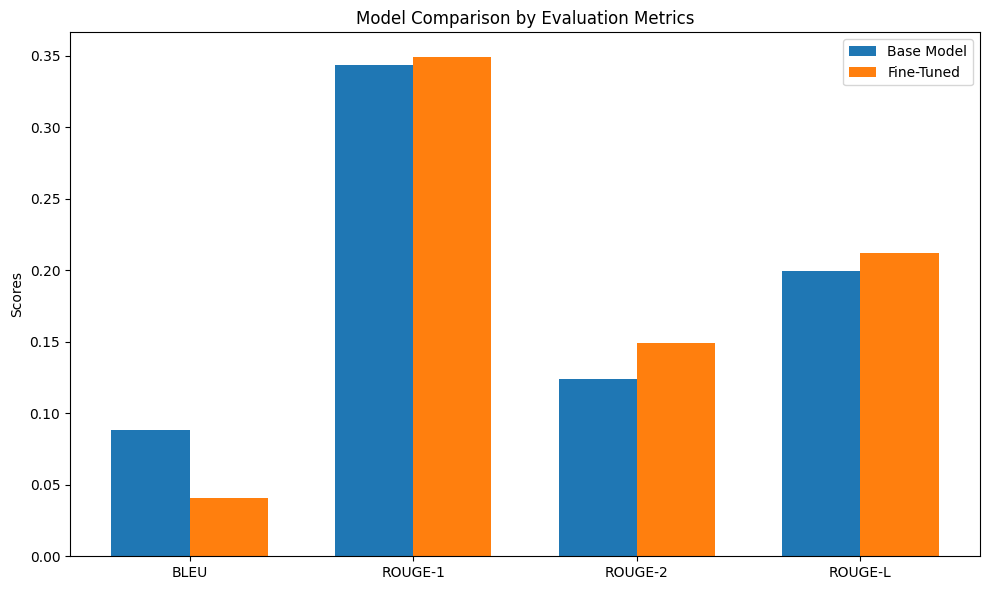

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
base_scores = [base_metrics['bleu'], base_metrics['rouge1'], base_metrics['rouge2'], base_metrics['rougeL']]
ft_scores = [ft_metrics['bleu'], ft_metrics['rouge1'], ft_metrics['rouge2'], ft_metrics['rougeL']]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], base_scores, width, label='Base Model')
rects2 = ax.bar([i + width/2 for i in x], ft_scores, width, label='Fine-Tuned')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/model_comparison.png')
plt.show()

Push to Hugging Face Hub

In [4]:
model.push_to_hub("uddin2023/databricks-docs-mistral-7b")
tokenizer.push_to_hub("uddin2023/databricks-docs-mistral-7b")

adapter_model.safetensors:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/uddin2023/databricks-docs-mistral-7b/commit/95c7b42ccad1a755ee2795e0545368db9aeaa2ff', commit_message='Upload tokenizer', commit_description='', oid='95c7b42ccad1a755ee2795e0545368db9aeaa2ff', pr_url=None, repo_url=RepoUrl('https://huggingface.co/uddin2023/databricks-docs-mistral-7b', endpoint='https://huggingface.co', repo_type='model', repo_id='uddin2023/databricks-docs-mistral-7b'), pr_revision=None, pr_num=None)